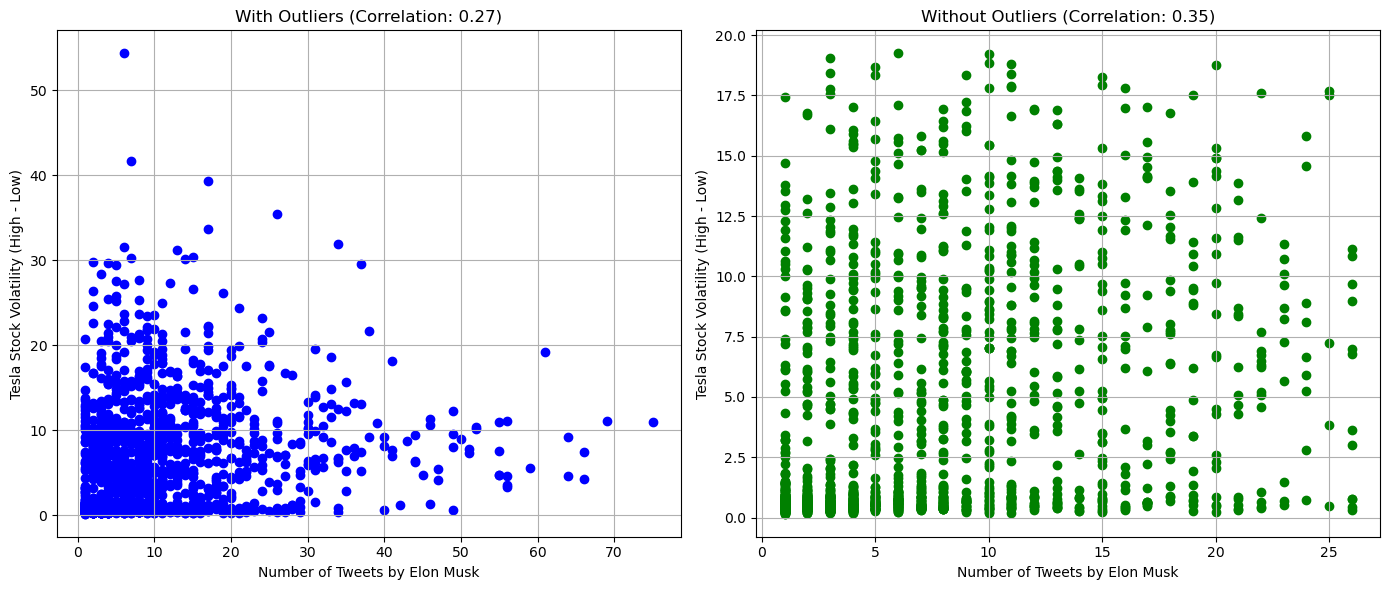

Correlation with outliers: 0.27
Correlation without outliers: 0.35


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the datasets
tsla = pd.read_json('tsla.json')
musk = pd.read_json('musk.json')

# Step 1: Calculate Tesla's stock price volatility (high - low)
tsla['Volatility'] = tsla['high'] - tsla['low']

# Step 2: Merge the datasets on the 'Date' column
merged_df = pd.merge(tsla, musk, on='Date')

# Step 3: Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 4: Remove outliers from both 'Tweet Count' and 'Volatility'
filtered_df = remove_outliers(merged_df, 'Tweet Count')
filtered_df = remove_outliers(filtered_df, 'Volatility')

# Step 5: Calculate the correlation coefficients for both with and without outliers

# Correlation with outliers
correlation_with_outliers, p_value_with_outliers = pearsonr(merged_df['Tweet Count'], merged_df['Volatility'])

# Correlation without outliers
correlation_without_outliers, p_value_without_outliers = pearsonr(filtered_df['Tweet Count'], filtered_df['Volatility'])

# Step 6: Create two graphs, one with outliers and one without, displaying correlation coefficients

plt.figure(figsize=(14, 6))

# Graph 1: With outliers
plt.subplot(1, 2, 1)
plt.scatter(merged_df['Tweet Count'], merged_df['Volatility'], color='blue')
plt.title(f'With Outliers (Correlation: {correlation_with_outliers:.2f})')
plt.xlabel('Number of Tweets by Elon Musk')
plt.ylabel('Tesla Stock Volatility (High - Low)')
plt.grid(True)

# Graph 2: Without outliers
plt.subplot(1, 2, 2)
plt.scatter(filtered_df['Tweet Count'], filtered_df['Volatility'], color='green')
plt.title(f'Without Outliers (Correlation: {correlation_without_outliers:.2f})')
plt.xlabel('Number of Tweets by Elon Musk')
plt.ylabel('Tesla Stock Volatility (High - Low)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

# Print the correlation coefficients
print(f"Correlation with outliers: {correlation_with_outliers:.2f}")
print(f"Correlation without outliers: {correlation_without_outliers:.2f}")
